<a href="https://colab.research.google.com/github/aplneto/IF1014/blob/main/05-DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

* [Google Developers' project](https://www.youtube.com/watch?v=LDRbO9a6XPU)
* [Bias vs. Variance](https://towardsdatascience.com/balancing-bias-and-variance-to-control-errors-in-machine-learning-16ced95724db)
* [A Guide to decision threes](https://towardsdatascience.com/a-guide-to-decision-trees-for-machine-learning-and-data-science-fe2607241956)


In [ ]:
import math
import numpy
import pandas

## Funções auxiliares

### Entropia

* $E = -\sum_{i}\sum_{j}p_{ij}log_2p_{ij} $, considerando que o sistema está no estado i e ocorre uma transição para o estado j para sistemas binários
* $E(S) = \sum_{i}^{c}-p_ilog_2p_i$, para mais de duas classes

### Gini Index

* $Gini(P) = \sum_{i=1}^{n}P_i(1-p_i)=1-\sum_{i=1}^n(p_i)^2$

### Ganho de informação

$GI(S, A) = E(S) - \sum_{v\in \textbf{Valores}(A)}{\frac{S_v}{S}E(S_v)}$, onde o segundo termo mede a Entropia do particionamento do conjunto de treinamento de acordo com o atributo A

In [ ]:
def entropy(Y:numpy.ndarray):
  labels = numpy.unique(Y)
  E = numpy.zeros((labels.size))
  for i, label in enumerate(labels):
    p = (Y == label).sum() / Y.size
    E[i] = p * math.log2(p)
  
  return -1 * numpy.sum(E)

def gini(Y: numpy.ndarray):
  labels = numpy.unique(Y)
  G = numpy.zeros((labels.size))
  for i, label in enumerate(labels):
    p = (Y == label).sum() / Y.size
    G[i] = (p)**2
  return 1 - numpy.sum(G)

def feature_information_gain(X:numpy.ndarray, Y:numpy.ndarray, i:int):
  '''
  X: Dataset containing features
  Y: Array containing labels
  i: feature column index
  '''
  E = entropy(Y)
  col = numpy.unique(numpy.sort(X.transpose()[i]))
  ig = numpy.zeros((col.size,))
  for n, v in enumerate(col):
    G1 = Y[(X[:, i] > v)]
    G2 = Y[~(X[:, i] > v)]
    ig[n] = E - (entropy(G1)*(G1.size/Y.size) + entropy(G2)*(G2.size/Y.size))

  j = numpy.argmax(ig)
  gain = numpy.max(ig)
  value = (
      numpy.mean(col[j-1:j+1])
      if j > 0
      else
      col[j]

  )
  return gain, value

def geature_gini_gain(X, Y, f):
  return 0.0

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
class DiscreteDecisionNode(object):
  def __init__(self, X, Y):
    self.__feature = None
    self.__value = None
    self.__leafs = [None, None]
    if numpy.unique(Y).size == 1:
      self.__value = numpy.unique(Y)[0]
    else:
      self.__fit(X, Y)
  
  def __fit(self, X, Y):
    f_gain = numpy.zeros((X.shape[1],))
    best_feature_value = numpy.zeros((X.shape[1]))
    for f in range(X.shape[1]):
      f_gain[f], best_feature_value[f] = feature_information_gain(X, Y, f)
    
    f = numpy.argmax(f_gain)
    v = best_feature_value[f]
    self.__feature = f
    self.__value = v
    Y1 = Y[(X[:, f] > v)]
    if Y1.size > 0:
      self.__leafs[1] = DiscreteDecisionNode(X[(X[:, f] > v)], Y1)
    Y2 = Y[~(X[:, f] > v)]
    if Y2.size > 0:
      self.__leafs[0] = DiscreteDecisionNode(X[~(X[:, f] > v)], Y2)

  def predict(self, X):
    if self.is_leaf:
      return self.__value
    else:
      return (
          self.__leafs[1].predict(X)
          if  X[self.__feature] > self.__value
          else self.__leafs[0].predict(X)
      )

  @property
  def is_leaf(self):
    return self.__leafs.count(None) == 2
  
  def __len__(self):
    left = 0 if self.__leafs[0] is None else len(self.__leafs[0])
    right = 0 if self.__leafs[1] is None else len(self.__leafs[1])
    return 1 + left + right
  
  def __str__(self):
    return (
        f'class {self.__value}'
        if self.is_leaf
        else f'X[{self.__feature}] > {self.__value}'
    )

In [ ]:
from matplotlib import pyplot

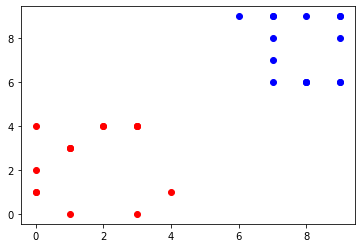

In [ ]:
s = 15

X1 = numpy.random.randint(0, 5, size=(s,2))
Y1 = numpy.asarray([0] * s)
X2 = numpy.random.randint(6, 10, size=(s,2))
Y2 = numpy.asarray([1] * s)

X = numpy.concatenate([X1, X2])
Y = numpy.concatenate([Y1, Y2])

fig, ax = pyplot.subplots()
ax.scatter(*zip(*X1), c='red', label='0')
ax.scatter(*zip(*X2), c='blue', label='1')
pyplot.show()

In [ ]:
d = DiscreteDecisionNode(X, Y)
print(len(d))

5


In [ ]:
print(d)
print(d._DiscreteDecisionNode__leafs[0], d._DiscreteDecisionNode__leafs[1])
print(
    d._DiscreteDecisionNode__leafs[1]._DiscreteDecisionNode__leafs[0],
    d._DiscreteDecisionNode__leafs[1]._DiscreteDecisionNode__leafs[1]
)

X[0] > 3.5
class 0 X[0] > 4.0
class 0 class 1
